In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'patch.linewidth': 1})

In [2]:
csvfile = '/Users/druce/metis/nyc18_ds17/challenges/challenges_data/2013_movies.csv'
data = pd.read_csv(csvfile, parse_dates=['ReleaseDate'], infer_datetime_format=True).sort_values("ReleaseDate")
data.head(10)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25
52,Warm Bodies,35000000.0,66380662,Jonathan Levine,PG-13,97,2013-02-01
87,Side Effects,NaN,32172757,Steven Soderbergh,R,106,2013-02-08
19,Identity Thief,35000000.0,134506920,Seth Gordon,R,111,2013-02-08
47,Safe Haven,28000000.0,71349120,Lasse Hallstrom,PG-13,115,2013-02-14
51,A Good Day to Die Hard,92000000.0,67349198,John Moore,R,97,2013-02-14


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 83 to 78
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 6.2+ KB


array(['R', 'PG-13', 'PG', 'G'], dtype=object)

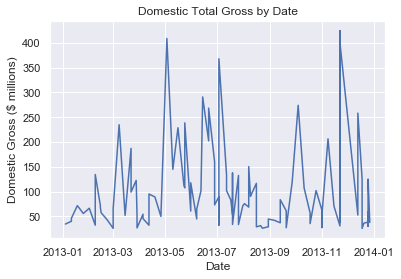

In [4]:
# **Challenge 1**
# Plot domestic total gross over time.

data["DomesticTotalGross"] = data["DomesticTotalGross"]/1000000
data["Budget"] = data["Budget"]/1000000

plt.plot(data["ReleaseDate"], data["DomesticTotalGross"]);
plt.title("Domestic Total Gross by Date")
plt.xlabel("Date");
plt.ylabel("Domestic Gross ($ millions)");
data["Rating"].unique()

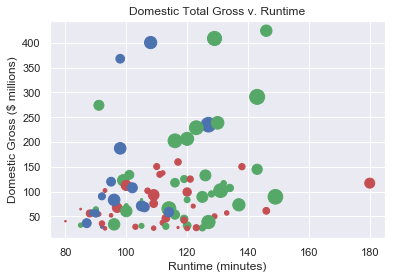

In [5]:
# **Challenge 2**
# Plot runtime vs. domestic total gross.

RatingColorDict = {'R' : 'r', 'PG-13' : 'g', 'PG': 'b', 'G': 'y'}
data["RatingColor"] = [RatingColorDict[i] for i in data.Rating]

plt.scatter(data.Runtime, data.DomesticTotalGross, c=data.RatingColor, s=data.Budget);
plt.title("Domestic Total Gross v. Runtime")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Domestic Gross ($ millions)");


In [6]:
#**Challenge 3**
#Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.


data[["Rating", "DomesticTotalGross","Runtime"]]\
    .groupby(['Rating'])\
    .mean()\
    .reset_index()\
    .sort_values(['Rating'])


,Rating,DomesticTotalGross,Runtime
0,G,268.492764,107.000000
1,PG,131.135716,99.933333
2,PG-13,111.449769,117.510638
3,R,69.892429,110.729730


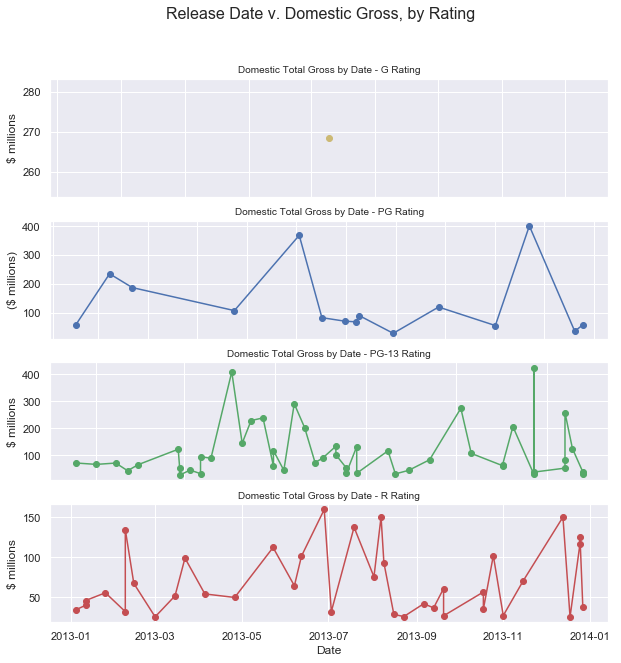

In [7]:
# **Challenge 4**
# Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

plt.figure(figsize=(10, 10));
plt.suptitle('Release Date v. Domestic Gross, by Rating', fontsize = 16);

# kind of brain dead way 
#for i, rating in enumerate(["R", "PG-13", "PG", "G"]):
ax1 = plt.subplot(4, 1, 4)
df=data[data.Rating == "R"]
plt.plot(df["ReleaseDate"], df["DomesticTotalGross"], marker='o', color='r');
plt.title("Domestic Total Gross by Date - " + "R" + " Rating", fontsize = 10)
plt.xlabel("Date");
plt.ylabel("$ millions");

ax2 = plt.subplot(4, 1,3)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
df=data[data.Rating == "PG-13"]
plt.plot(df["ReleaseDate"], df["DomesticTotalGross"], marker='o', color='g');
plt.title("Domestic Total Gross by Date - " + "PG-13" + " Rating", fontsize = 10)
plt.ylabel("$ millions");

ax3 = plt.subplot(4, 1, 2)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
df=data[data.Rating == "PG"]
plt.plot(df["ReleaseDate"], df["DomesticTotalGross"], marker='o', color='b');
plt.title("Domestic Total Gross by Date - " + "PG" + " Rating", fontsize = 10)
plt.ylabel("($ millions)");

ax4 = plt.subplot(4, 1, 1)
frame1 = plt.gca()

frame1.axes.xaxis.set_ticklabels([])
df=data[data.Rating == "G"]
plt.plot(df["ReleaseDate"], df["DomesticTotalGross"], marker='o', color='y');
plt.title("Domestic Total Gross by Date - " + "G" + " Rating", fontsize = 10)
plt.ylabel("$ millions");


In [8]:
#**Challenge 5**
#What director in your dataset has the highest gross per movie?


topdirector = data[["Director", "DomesticTotalGross"]]\
    .groupby(['Director'])\
    .mean()\
    .sort_values(['DomesticTotalGross'], ascending=False)\
    .reset_index()\
    .iloc[0]["Director"]

print(topdirector)

data[["Director", "DomesticTotalGross"]]\
    .groupby(['Director'])\
    .mean()\
    .sort_values(['DomesticTotalGross'], ascending=False)\
    .reset_index()\
    .head()



Francis Lawrence


,Director,DomesticTotalGross
0,Francis Lawrence,424.668047
1,Shane Black,409.013994
2,Chris BuckJennifer Lee,400.738009
3,Pierre CoffinChris Renaud,368.061265
4,Zack Snyder,291.045518


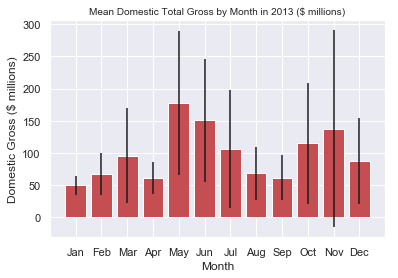

In [9]:
#**Challenge 6**

#Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

#Title of graph should include:  Mean Domestic Total Gross by Month in 2013

#Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."

import calendar
import datetime
from time import strftime

data['ReleaseMonth'] = data.ReleaseDate.dt.strftime('%b')
data['ReleaseMonthIndex'] = data.ReleaseDate.dt.strftime('%m')
barmeans = data[["ReleaseMonth", "ReleaseMonthIndex", "DomesticTotalGross"]]\
    .groupby(["ReleaseMonth", "ReleaseMonthIndex"])\
    .mean()\
    .sort_values("ReleaseMonthIndex")\
    .reset_index()[["ReleaseMonth", "DomesticTotalGross"]]\

barstds = data[["ReleaseMonth", "ReleaseMonthIndex", "DomesticTotalGross"]]\
    .groupby(["ReleaseMonth", "ReleaseMonthIndex"])\
    .std()\
    .sort_values("ReleaseMonthIndex")\
    .reset_index()

plt.bar(barmeans["ReleaseMonth"], barmeans["DomesticTotalGross"], color='r', yerr=barstds["DomesticTotalGross"]);
plt.title("Mean Domestic Total Gross by Month in 2013 ($ millions)", fontsize = 10);
plt.xlabel("Month");
plt.ylabel("Domestic Gross ($ millions)");

### The November error bar goes below 0
### There are a couple of big positive, outliers, so the standard deviation exceeds the mean
### Fou can't have a negative gross so the error bar isn't a very good indication of values to expect
### Formula below

In [11]:
nov_values = data[data["ReleaseMonth"]=="Nov"]["DomesticTotalGross"]
nov_values

56     61.737191
55     63.914167
94     27.298285
62     55.750480
11    206.362140
49     70.525195
90     30.664106
0     424.668047
79     37.709979
2     400.738009
Name: DomesticTotalGross, dtype: float64

In [12]:
sum(nov_values)/len(nov_values)

137.9367599

In [13]:
print("standard deviation")
np.sqrt(sum([(x - 137.9367599)**2 for x in nov_values])/len(nov_values))

standard deviation


145.7187992096933